In [5]:
from lectura import ldata
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from  collections  import defaultdict
from scipy import optimize
import os

In [15]:
# Ejercicio 1
# Red de interacciones binarias(yeast_Y2H.txt)
# Red de copertenecia o complejos proteícos(yeast_AP-MS.txt)
# Red obtenida de literatura: Yeast Interactome Database(yeast_LIT.txt)

In [12]:
# El directorio que vamos a usar en cada lectura de datos de ahora en mas
directorio = os.path.dirname(os.path.realpath("yeast_AP-MS.txt"))

In [14]:
fnMS = os.path.join(directorio,'tc01_data/yeast_AP-MS.txt')
fnLIT = os.path.join(directorio,'tc01_data/yeast_LIT.txt')
fnY2H = os.path.join(directorio,'tc01_data/yeast_Y2H.txt')

# Se leen los datos de las redes
datosapms=ldata(fnMS)
datoslit=ldata(fnLIT)
datosy2h=ldata(fnY2H)

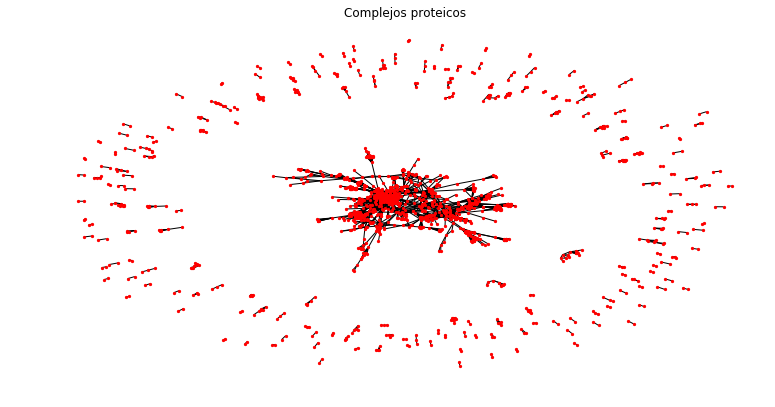

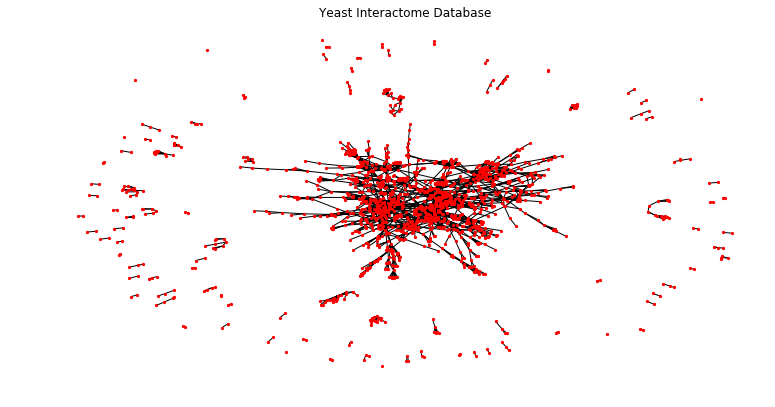

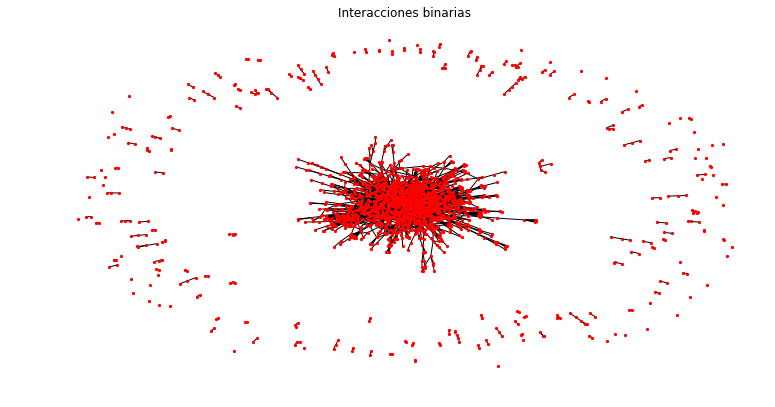

In [15]:
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()

G1.add_edges_from(datosapms)
G2.add_edges_from(datoslit)
G3.add_edges_from(datosy2h)

# Gráfico de cada red
plt.figure(figsize=(10,5))
nx.draw(G1, with_labels=False, node_size=5)
plt.title("Complejos proteicos")
plt.show()

plt.figure(figsize=(10,5))
nx.draw(G2, with_labels=False, node_size=5)
plt.title("Yeast Interactome Database")
plt.show()

plt.figure(figsize=(10,5))
nx.draw(G3, with_labels=False, node_size=5)
plt.title("Interacciones binarias")
plt.show()

In [16]:
# Características de las redes

# Numero total de nodos
N = [G1.number_of_nodes(),G2.number_of_nodes(),G3.number_of_nodes()]

# Numero total de enlaces
L = [G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()]

dirigido = ["no","no","no"]

# Grado medio
kmean = [np.mean(list(dict(G1.degree).values())),np.mean(list(dict(G2.degree).values())),
         np.mean(list(dict(G3.degree).values()))]

# Grado mínimo
kmin = [np.min(list(dict(G1.degree).values())),np.min(list(dict(G2.degree).values())),
         np.min(list(dict(G3.degree).values()))]

# Grado máximo
kmax = [np.max(list(dict(G1.degree).values())),np.max(list(dict(G2.degree).values())),
         np.max(list(dict(G3.degree).values()))]

# Densidad
densidad = [nx.density(G1),nx.density(G2),nx.density(G3)]

# Coeficiente de clustering global
clusteringglobal = [nx.transitivity(G1),nx.transitivity(G2),nx.transitivity(G3)]

# Coeficiente de clustering local
clusteringlocal = [nx.average_clustering(G1),nx.average_clustering(G2),nx.average_clustering(G3)]

# Diámetro 
diametro = [nx.diameter(max(nx.connected_component_subgraphs(G1), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G2), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G3), key=len))]

In [19]:
# Tabla con las caraterísticas de las redes
info= pd.DataFrame({"ID":['apms','YID_lit','y2h'],"nodos":N,"enlaces":L,"dirigido":dirigido,"kmean":kmean,
                    "kmin":kmin,"kmax":kmax,"densidad":densidad,"clusteringglobal":clusteringglobal,
                    "clusteringlocal":clusteringlocal,"diametro":diametro})

In [20]:
info

,ID,clusteringglobal,clusteringlocal,densidad,diametro,dirigido,enlaces,kmax,kmean,kmin,nodos
0,apms,0.618590,0.554636,0.006899,15,no,9070,127,11.183724,1,1622
1,YID_lit,0.346193,0.292492,0.002481,19,no,2925,40,3.808594,1,1536
2,y2h,0.023614,0.046194,0.001440,14,no,2930,91,2.903865,1,2018


In [ ]:
"""
De este ejercicio no recuerdo que era lo que no había que hacer y lo que sí

"""

In [ ]:
## Ejercicio 2

In [21]:
fnDOL = os.path.join(directorio,'tc01_data/dolphins.gml')
delfines = nx.read_gml(fnDOL)

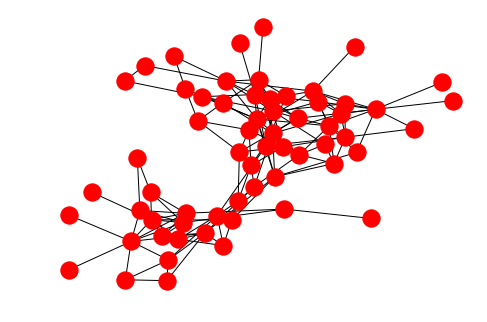

In [22]:
nx.draw(delfines)#, with_labels=True)
plt.show()

In [23]:
delfines.node

NodeView(('Patchback', 'Upbang', 'Topless', 'Quasi', 'Wave', 'Mus', 'SN100', 'CCL', 'PL', 'Kringel', 'Fork', 'Jet', 'Cross', 'Zipfel', 'TSN103', 'Notch', 'SN63', 'Gallatin', 'DN16', 'MN105', 'SN9', 'TSN83', 'Vau', 'MN23', 'Haecksel', 'Grin', 'Scabs', 'Zig', 'TR77', 'SN4', 'Trigger', 'Thumper', 'Knit', 'Beescratch', 'Feather', 'MN83', 'SN90', 'Fish', 'Shmuddel', 'Jonah', 'Bumper', 'Stripes', 'Hook', 'SN89', 'TR99', 'Five', 'Web', 'SMN5', 'Zap', 'Whitetip', 'Double', 'TR120', 'DN21', 'Oscar', 'Ripplefluke', 'Beak', 'Number1', 'DN63', 'SN96', 'TR88', 'TR82', 'MN60'))

In [24]:
generos=ldata('tc01_data/dolphinsGender.txt')

In [25]:
print(generos)

[['Five', 'f'], ['Cross', 'm'], ['SMN5', 'm'], ['MN83', 'm'], ['Trigger', 'f'], ['Patchback', 'm'], ['Vau', 'f'], ['Fork', 'm'], ['TR120', 'f'], ['MN105', 'm'], ['Haecksel', 'm'], ['MN60', 'm'], ['Stripes', 'f'], ['Jonah', 'm'], ['TSN103', 'f'], ['Topless', 'm'], ['Scabs', 'f'], ['TR99', 'f'], ['Shmuddel', 'f'], ['TSN83', 'NA'], ['Grin', 'm'], ['Zap', 'NA'], ['SN9', 'f'], ['SN4', 'f'], ['SN63', 'f'], ['Hook', 'f'], ['Whitetip', 'f'], ['Kringel', 'f'], ['Zipfel', 'm'], ['SN89', 'f'], ['SN100', 'f'], ['Double', 'f'], ['CCL', 'f'], ['Thumper', 'm'], ['Beak', 'm'], ['Fish', 'f'], ['Oscar', 'm'], ['TR77', 'f'], ['SN96', 'm'], ['Bumper', 'm'], ['PL', 'm'], ['TR82', 'NA'], ['DN16', 'f'], ['Web', 'm'], ['SN90', 'm'], ['Beescratch', 'm'], ['Wave', 'f'], ['Feather', 'm'], ['Gallatin', 'm'], ['Upbang', 'm'], ['DN63', 'm'], ['DN21', 'm'], ['Jet', 'm'], ['Number1', 'm'], ['Knit', 'm'], ['Zig', 'm'], ['Ripplefluke', 'NA'], ['MN23', 'm'], ['Quasi', 'm'], ['Mus', 'm'], ['Notch', 'm'], ['TR88', 'f']]


In [26]:
# Asigno la clase genero a cada nodo de la red
for delfin in generos:    
    delfines.node[delfin[0]]["genero"]=delfin[1]    

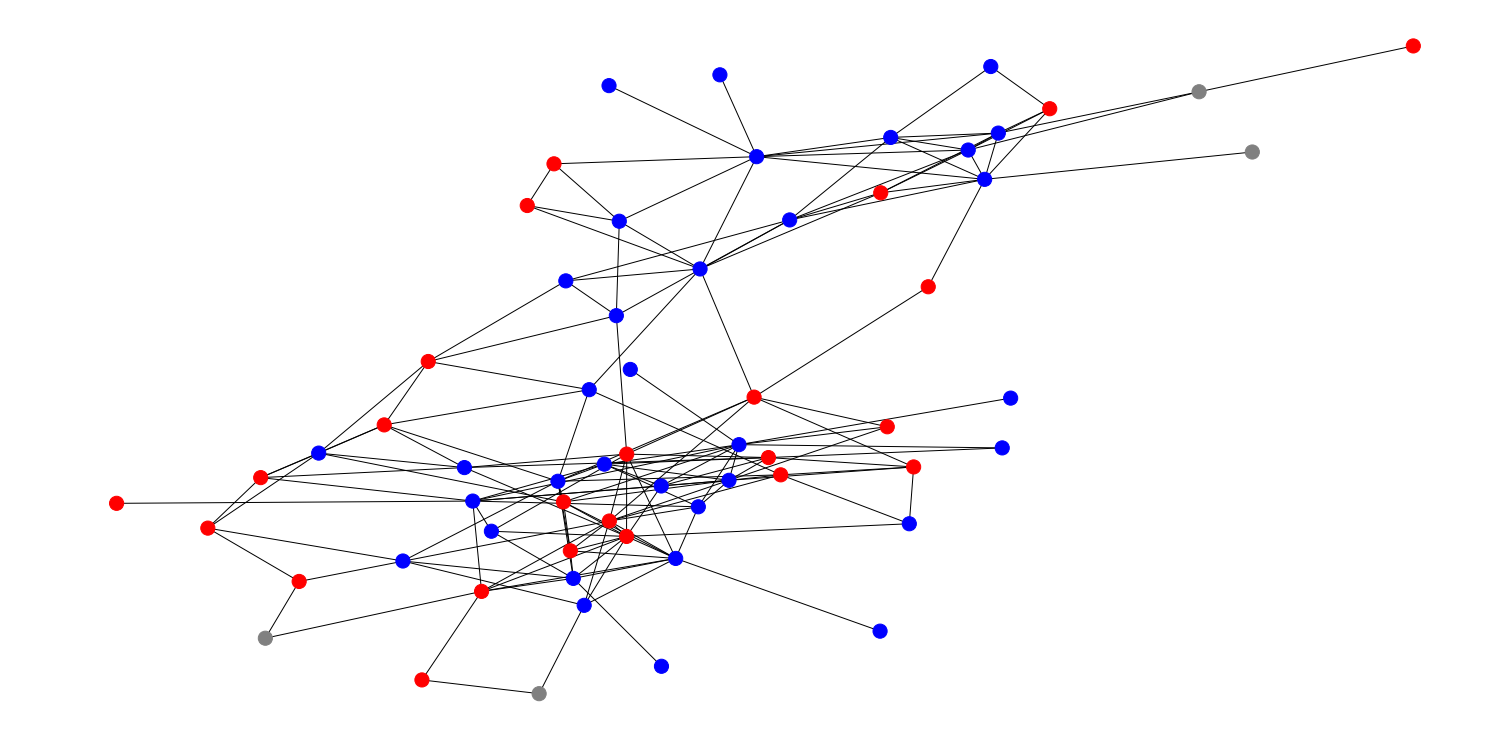

In [27]:
plt.figure(figsize=(20,10))
nx.draw(delfines, 
        width=1, 
        node_color=["blue" if g=="m" else "red" if g=="f" else "grey"  for g in nx.get_node_attributes(delfines, "genero").values()], 
        node_size=200,
        with_labels=False,
       pos=nx.fruchterman_reingold_layout(delfines)
       )
plt.show()

0.554440251572
0.0393761244167


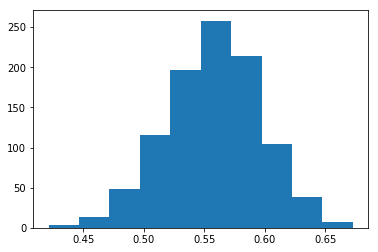

0.39622641509433965
0.0


In [32]:
sexos=dict(delfines.node.data("genero"))
test=delfines.copy()  # Si ponés igual se te modifica todo junto
N=1000
cantidadcruzada=[]

# N realizaciones aleatorias de genero  
for i in range(N):
    for delfin,genero in zip(test,np.random.permutation(list(sexos.values()))):
        
        # Asigna genero a delfines(nodos) de test a partir de la realizacion aleatoria       
        test.node[delfin]["genero"]=genero
       
    # Cuenta el # de enlaces de generos diferentes (clsases diferentes) para cada red aleatoria
    contador=0
    for enlaces in list(test.edges): 
        
            # Compara el genero de dos nodos enlazados    
            if test.node[enlaces[0]]["genero"]!=test.node[enlaces[1]]["genero"]:
                contador=contador+1
                
    cantidadcruzada.append(contador/test.number_of_edges())

cantidadcruzada.sort()
print(np.mean(cantidadcruzada)) # El promedio de los porcentajes de enlaces que son homofílicos 
                                # de la asignación aleatoria de géneros.
print(np.std(cantidadcruzada))  #La desviación estándar de lo mismo


plt.hist(cantidadcruzada)
plt.show()

# Cuenta el # de enlaces de generos diferentes (clsases diferentes) en la red original
contador=0
for enlaces in list(delfines.edges):
            if delfines.node[enlaces[0]]["genero"]!=delfines.node[enlaces[1]]["genero"]:
                contador=contador+1       
            
cruzadadelfines=contador/delfines.number_of_edges()  #el porcentaje de enlaces que son homofílicos
print(cruzadadelfines)


j=0
while cantidadcruzada[j]<cruzadadelfines:
    j=j+1
print(j/N) #p-valor


In [41]:
# Ejercicio 3

"""
Considere la red as-22july06.gml creada por Mark Newman que contiene la estructura de los
sistemas autónomos de internet relevada a mediados de 2006.

a. Encuentre gráficamente la distribución de grado Pk como función de k explorando
diferentes alternativas: un bineado lineal o logarítmico, utilizando escalas logarítmicas o
lineales en uno o ambos ejes. Discuta que alternativa permite apreciar mejor el carácter
libre de escala de dicha distribución
"""

In [34]:
fn_int = os.path.join(directorio,'tc01_data/as-22july06.gml')
sistautinternet = nx.read_gml(fn_int)

In [ ]:
#nx.draw(sistautinternet)#, with_labels=True)
#plt.show()

In [36]:
# Librería para crear contables
from collections import defaultdict

grados = defaultdict(int)                   # valor inicial es int: 0
for i in (list(dict(sistautinternet.degree).values())): 
    grados[i]+=1                            # Para cada elemento de la lista el valor se incrementa en uno donde el grado es i
    gord = sorted(grados.items())     
    k, pk = np.array(gord).T                # Arma dos matrices con la misma dimension para el grafico.
                                            # porque sólo te grafica si es vertical
    pk = [float(i) / sum(pk) for i in pk]   # Calculo de la probabilidad 

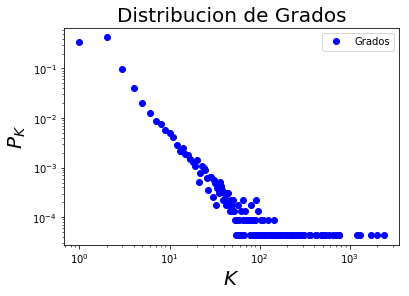

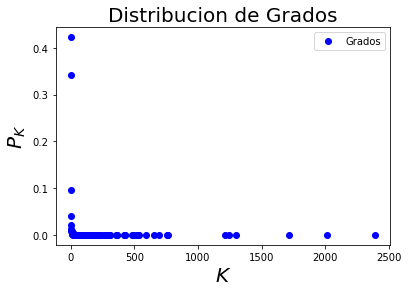

In [37]:
# Bineado lineal 

# Escala logartimica
plt.plot(k, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()
   
    
# Escala lineal    
plt.plot(k, pk, 'bo')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()    

In [44]:
# Beneado Logaritmico para pk y k

# Para pk
grados = defaultdict(int)
j=1
while j<=(max((list(dict(sistautinternet.degree).values())))):
    for i in (list(dict(sistautinternet.degree).values())): 
        if i<=j and i>=j/2:
            grados[j]+=1        
    j=j*2        
gord = sorted(grados.items())    
k, pk = np.array(gord).T   
#print (pk,k)

pk = [i/float(j) for i,j in zip(pk,k)] #Aquí cambie a flotante porque me daba mal. Creo que por la version de python

# Para k
# Hace celdas equiespaciadas en escala logaritmica que dependen del grado
bins=[1]
s=1
j=1
for t in k[1:]:
    s=j+t/2  
    j=j+t
    bins.append(s)
print (bins,k)

[1, 2.0, 5.0, 11.0, 23.0, 47.0, 95.0, 191.0, 383.0, 767.0, 1535.0, 3071.0] [   1    2    4    8   16   32   64  128  256  512 1024 2048]


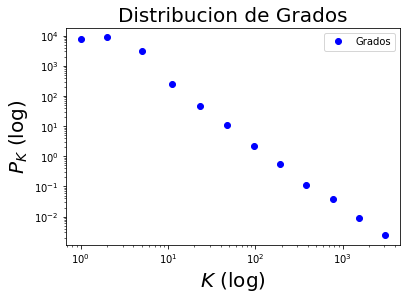

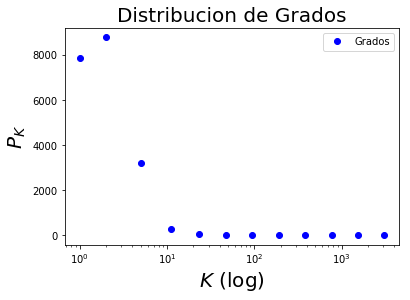

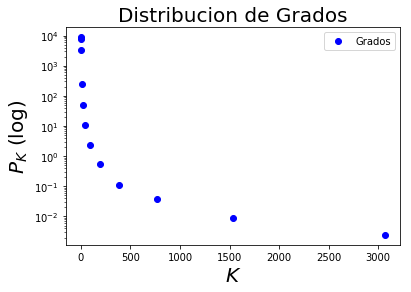

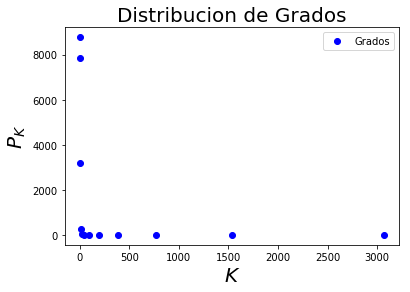

In [48]:
# Bineado logaritmico con escala lgaritmica en ambos ejes

plt.plot(bins, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
#plt.loglog(bins,pk,'o',c="blue")
plt.xlabel('$K$ (log)', fontsize = 20)
plt.ylabel('$P_K$ (log)', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()
 
# Escala logaritmica en k 
plt.plot(bins, pk, 'bo')
plt.xscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$ (log)', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()

# Escala logaritmica en pk
plt.plot(bins, pk, 'bo')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$ (log)', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()
 
# Solo bineado    
plt.plot(bins, pk, 'bo')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()


In [17]:
# Discuta que alternativa permite apreciar mejor el carácter libre de escala de dicha distribución.
"""
Una red se considera libre de escala si su distribución de grados sigue una ley de potencias de exponente negativo.
En las gráficas de bineado linel ya es posible apreciar el comportamiento libre de escalas porque se aprecia una
cantidad pequeña de nodos muy conectados (alto grado k) y una mayoría de nodos con pocas conexiones; pero se pierden 
detalles. Sin embargo, tomando logaritmo en ambos ejes la distribución se aproxima a una recta, de modo que si la 
relación se mantiene, la probabilidad de que un nodo tenga grado k depende lienalmente de k. 
Tomando bineado logaritmico donde establecemos celdas equiespaciadas y logartimo en ambos ejes se puede apreciar mejor
que la distribución sigue casi perfectamente una recta con exponente(pendiente) negativa; también se muestra 
perfectamente cuando tomamos solo escala logaritmica sobre los grados.

"""

'\nUna red se considera libre de escala si su distribuci\xc3\xb3n de grados sigue una ley de potencias de exponente negativo.\nEn las gr\xc3\xa1ficas de bineado linel ya es posible apreciar el comportamiento libre de escalas porque se aprecia una\ncantidad peque\xc3\xb1a de nodos muy conectados (alto grado k) y una mayor\xc3\xada de nodos con pocas conexiones; pero se pierden \ndetalles. Sin embargo, tomando logaritmo en ambos ejes la distribuci\xc3\xb3n se aproxima a una recta de modo que si la \nrelaci\xc3\xb3n se mantiene, la probabilidad de que un nodo tenga grado k depende lienalmente de k. \nTomando bineado logaritmico donde establecemos celdas equiespaciadas y logartimo en ambos ejes se puede apreciar mejor\nque la distribuci\xc3\xb3n sigue casi perfectamente una recta con exponente(pendiente) negativa.\n'

In [49]:
# Estimación del exponente minimizando la función de verosimilitud

# Toma logaritmo en base 10 de los datos de entrada
logx = np.log10(bins)
logy = np.log10(pk)

fitfunc = lambda p, x: p[0] + p[1] * x              # Curva de ajuste
errfunc = lambda p, x, y: (y - fitfunc(p, x))       # funcion de error

p0 = [5, -2.0]  # Estimación inicial a minimizar                   

out = optimize.leastsq(errfunc, p0,  args=(logx, logy), full_output=1) # Minimiza la suma de los cuadrados entre la
                                                                       # estimación inicial y el error
pfinal = out[0]

print(pfinal)
index = pfinal[1]
amp = 10.0**pfinal[0]       """yuya: no entiendo este 10""" 

# Minimiza poco 
#El problema es que no minimiza nada y devuelve la p inicial.

[ 4.42018009 -2.0273688 ]


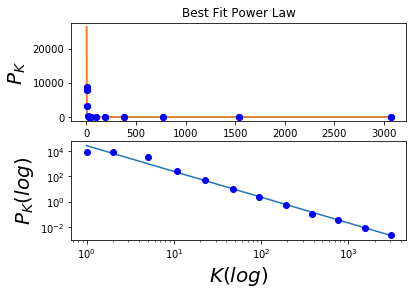

In [51]:
# Grafica del ajute asumiendo la siguiente hipotesis:
powerlaw = lambda x, amp, index: amp * (x**index)

#plt.clf()
plt.subplot(2, 1, 1)
plt.plot(bins, powerlaw(bins, amp, index))     # Fit
plt.plot(bins, pk, 'bo')                       # Data
#plt.text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
#plt.text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
plt.title('Best Fit Power Law')

plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)

plt.subplot(2, 1, 2)
plt.loglog(bins, powerlaw(bins, amp, index))
plt.loglog(bins, pk, 'bo')  # Data

plt.xlabel('$K(log)$', fontsize = 20)
plt.ylabel('$P_K(log)$', fontsize = 20)
plt.show()

In [26]:
# Ejercicio 4

In [52]:
fn_sc = os.path.join(directorio,'tc01_data/netscience.gml')
fn_internet = os.path.join(directorio,'tc01_data/as-22july06.gml')

netscience = nx.read_gml(fn_sc)
redinternet = nx.read_gml(fn_internet)

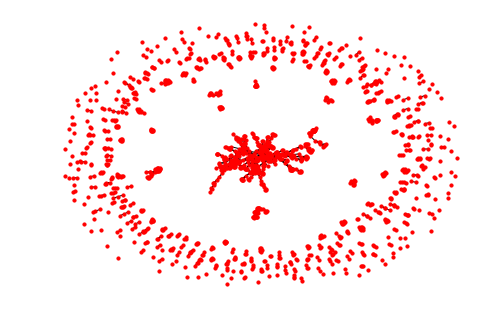

In [53]:
nx.draw(netscience, node_size=10)
plt.show()

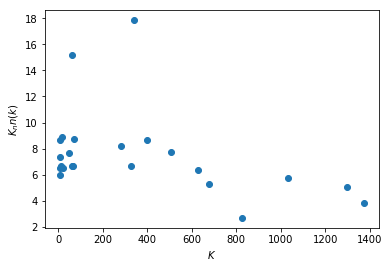

In [54]:
# i)

# Este ciclo recorre nodo por nodo, se fija en el grado de sus vecinos, suma sus grados y calcula el promedio
gradosporgrado = defaultdict(int)
gradosporgrado2 = defaultdict(int)
gradonodlista=[]
gradopromediolista=[]

for nod in list(netscience.node):
    vecinos=list(netscience.adj[nod])     #los vecinos de nodo
    gradonod=len(vecinos)                 # cantidad de vecinos de nodo o grado del nodo
    
    gradostotal=0
    for estevecino in vecinos:
        gradostotal = gradostotal + netscience.degree[estevecino]  #Suma los grados de todos los vecinos de nod
    try:
        gradopromedio = gradostotal/gradonod                       # Calcula el grado promedio de los vecinos de nod
    
    except:
        netscience.remove_nodes_from([nod])                        # Revisar este try que no hace nada 
    
        
    
#    gradonodlista.append(gradonod)
#    gradopromediolista.append(gradopromedio)
    gradosporgrado[gradonod] += gradopromedio         # Diccionario contable que suma los promedios correspondientes a un mismo grado   
    gradosporgrado2[gradonod]+= 1                     

# Arma lista con knn(k) y lista con k
for i,j in zip(gradosporgrado.items(),gradosporgrado2.items()):
    gradonodlista.append(i[1])
    gradopromediolista.append(i[1]/j[1])    

plt.scatter(gradonodlista,gradopromediolista)
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()


(0.9557429174383627, -0.07830517729759102, 9.031147126660336, -0.07830517729759102)


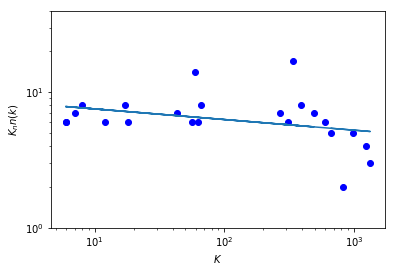

In [216]:
# ii)

# Análisis de la tendencia observada de la red ciencia

powerlaw = lambda x, amp, index: amp * (x**index)

grad = np.log10(gradonodlista)
gradpromvecinos = np.log10(gradopromediolista)


fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x)) 

pinit = [5, -2.0]
out = optimize.leastsq(errfunc, pinit,  args=(grad, gradpromvecinos), full_output=1)
pfinal = out[0]


index = pfinal[1]
amp = 10.0**pfinal[0]

print(pfinal[0],pfinal[1],amp,index)

plt.clf()
plt.loglog(gradonodlista,gradopromediolista,'bo') 
plt.plot(gradonodlista, powerlaw(gradonodlista, amp, index))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.ylim(1,40)                      
plt.show()


(-0.07830517851703611, 0.9557429198822351, 9.031147177480626, -0.34430667861121106, 0.10766285656374612, 0.046594531346189176)


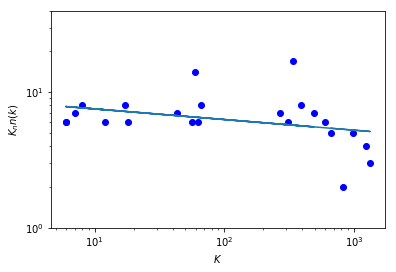

In [222]:
# iii)

# Regresion lineal
from scipy import stats

grad = np.log10(gradonodlista)
gradpromvecinos = np.log10(gradopromediolista)

slope, intercept, r_value, p_value, std_err = stats.linregress(grad,gradpromvecinos)

intercepto = 10.0**intercept      # No se si esto se puede hacer: revisar
print (slope, intercept, intercepto,r_value, p_value, std_err )

plt.clf()
plt.loglog(gradonodlista,gradopromediolista,'bo') 
plt.plot(gradonodlista, powerlaw(gradonodlista, intercepto, slope))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.ylim(1,40)                      
plt.show()


"""
Según las diapositivas del profesor en clases la pendiente(U) para este tipo de redes debería ser mas menos
0.3. No me da así por ninguno de los 3 metodos, hay algo mal o todo está mal

"""

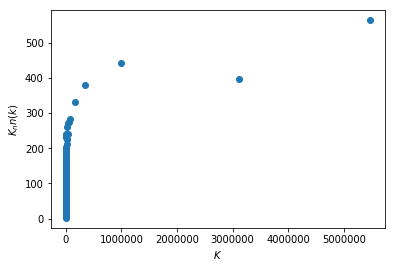

In [92]:
# Para la red de internet
# i)

# Este ciclo recorre nodo por nodo, se fija en el grado de sus vecinos, suma sus grados y calcula el promedio
gradosporgrado_int = defaultdict(int)
gradosporgrado2_int = defaultdict(int)
gradonodlista_int=[]
gradopromediolista_int=[]

for nod in list(redinternet.node):
    vecinos=list(redinternet.adj[nod])     #los vecinos de nodo
    gradonod=len(vecinos)                 # cantidad de vecinos de nodo o grado del nodo
    
    gradostotal=0
    for estevecino in vecinos:
        gradostotal = gradostotal + redinternet.degree[estevecino]  #Suma los grados de todos los vecinos de nod
    try:
        gradopromedio = gradostotal/gradonod                       # Calcula el grado promedio de los vecinos de nod
    
    except:
        redinternet.remove_nodes_from([nod])                        # Revisar este try que no hace nada 
    
        
    
#    gradonodlista.append(gradonod)
#    gradopromediolista.append(gradopromedio)
    gradosporgrado_int[gradonod] += gradopromedio         # Diccionario contable que suma los promedios correspondientes a un mismo grado   
    gradosporgrado2_int[gradonod]+= 1                     

# Arma lista con knn(k) y lista con k
for i,j in zip(gradosporgrado_int.items(),gradosporgrado2_int.items()):
    gradonodlista_int.append(i[1])
    gradopromediolista_int.append(i[1]/j[1])    

plt.scatter(gradonodlista_int,gradopromediolista_int)
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()




[1.15084894 0.30442802]


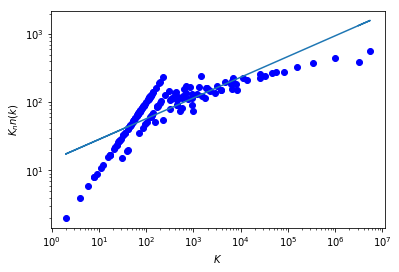

In [231]:
# Análisis de la tendencia observada para la red de internet
# ii)

powerlaw = lambda x, amp, index: amp * (x**index)

grad_int = np.log10(gradonodlista_int)
gradpromvecinos_int = np.log10(gradopromediolista_int)


fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x)) 

pinit = [5, -2.0]
out_int = optimize.leastsq(errfunc, pinit,  args=(grad_int, gradpromvecinos_int), full_output=1)
pfinal_int = out_int[0]

print(pfinal_int)
index_int = pfinal_int[1]
amp_int = 10.0**pfinal_int[0]

plt.clf()
plt.loglog(gradonodlista_int,gradopromediolista_int,'bo') 
plt.plot(gradonodlista_int, powerlaw(gradonodlista_int, amp_int, index_int))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
#plt.ylim(1,40)                      
plt.show()


"""
Creen que deberiamos hacer bineado logaritmico?, solo está tomado a escala log 
"""

(0.30442802202954267, 1.1508489443291077, 14.1530142626708)


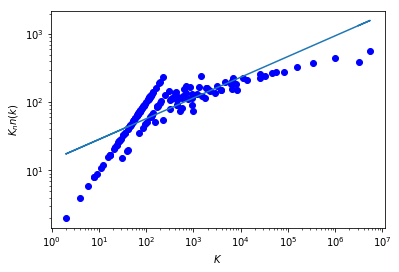

In [229]:
# Regresion lineal para la red de internet
# iii)

from scipy import stats
slope_int, intercept_int, r_value_int, p_value_int, std_err_int = stats.linregress(grad_int,gradpromvecinos_int)
#print (slope_int, intercept_int, r_value_int, p_value_int, std_err_int)

intercepto_int = 10.0**intercept_int      # No se si esto se puede hacer: revisar
print (slope_int, intercept_int,intercepto_int)

plt.clf()
plt.loglog(gradonodlista_int,gradopromediolista_int,'bo') 
plt.plot(gradonodlista_int, powerlaw(gradonodlista_int, intercepto_int, slope_int))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
#plt.ylim(1,40)                      
plt.show()


In [200]:
# Coeficiente de correlación usando el estimador propuesto por NEWMAN 
# Para la red de colaboraciones
# vi)

# Funcion que sumará las listas de grados
def sumarLista(lista):
    sum=0
    for i in range(0,len(lista)):
        sum=sum+lista[i]
    return sum    

sumse = []
sums1 = []
sums2 = []
sums3 = []
listnodos = []

# Ciclo que recorre todos los enlaces de la red
for enlace in list(netscience.edges):    
    se = netscience.degree(enlace[0])*netscience.degree(enlace[1]) # multiplica grados de nodos en enlace
    sumse.append(se)    
    
    for node in list(enlace):                                       
        if node not in listnodos:  # se fija si el nodo está en la lista de nodos                                  
            
            listnodos.append(node)
            s1 = netscience.degree(node)
            sums1.append(s1)
            s2 = netscience.degree(node)**2
            sums2.append(s2)
            s3 = netscience.degree(node)**3
            sums3.append(s3)        
            
        
#sumse = 2*sumse 

print(sumarLista(sumse))

sumnumerador = (sumarLista(sums1)*(2*sumarLista(sumse)))-(sumarLista(sums2)**2) 
sumdenominador = (sumarLista(sums1)*sumarLista(sums3))-(sumarLista(sums2)**2)

coef = float(sumnumerador/sumdenominador)    # me tiene en duda que da 0, creo que habría que revisar  
print (coef)
print (len(listnodos),len(netscience.edges()))
    

175110
0.0
(1461, 2742)


In [202]:
# Coeficiente de correlación usando el estimador propuesto por NEWMAN 
# Para la red de internet  
# vi)

sumse_int = []
sums1_int = []
sums2_int = []
sums3_int = []
listnodos_int = []

# Ciclo que recorre todos los enlaces de la red
for enlace in list(redinternet.edges):    
    se = redinternet.degree(enlace[0])*redinternet.degree(enlace[1]) # multiplica grados de nodos en enlace
    sumse_int.append(se)    
    
    for node in list(enlace):                                       
        if node not in listnodos_int:        # se fija si el nodo está en la lista de nodos                                  
            
            listnodos_int.append(node)
            s1 = redinternet.degree(node)
            sums1_int.append(s1)
            s2 = redinternet.degree(node)**2
            sums2_int.append(s2)
            s3 = redinternet.degree(node)**3
            sums3_int.append(s3)        
            
print(sumarLista(sumse_int))

sumnumerador_int = (sumarLista(sums1_int)*(2*sumarLista(sumse_int)))-(sumarLista(sums2_int)**2) 
sumdenominador_int = (sumarLista(sums1_int)*sumarLista(sums3_int))-(sumarLista(sums2_int)**2)

coef_int = float(sumnumerador_int/sumdenominador_int)    # me tiene en duda que da -1, creo que habría que revisar  
print (coef_int)
#print (len(listnodos),len(netscience.edges()))

382042605
-1.0


In [203]:
apms=ldata('tc01_data/yeast_AP-MS.txt')
y2h=ldata('tc01_data/yeast_Y2H.txt')

graph_apms = nx.Graph()
graph_y2h = nx.Graph()

graph_apms.add_edges_from(apms)
graph_y2h.add_edges_from(y2h)

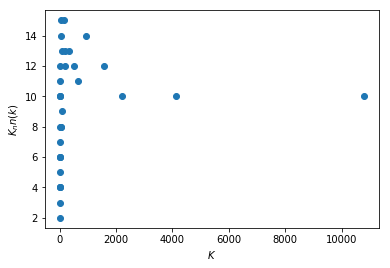

In [204]:
# Ejercicio 4bi

# Este ciclo recorre nodo por nodo, se fija en el grado de sus vecinos, suma sus grados y calcula el promedio
# Para la red Y2H

gradosporgrado_y2h = defaultdict(int)
gradosporgrado2_y2h = defaultdict(int)
gradonodlista_y2h = []
gradopromediolista_y2h = []

for nod in list(graph_y2h.node):
    vecinos=list(graph_y2h.adj[nod])     #los vecinos de nodo
    gradonod=len(vecinos)                 # cantidad de vecinos de nodo o grado del nodo
    
    gradostotal=0
    for estevecino in vecinos:
        gradostotal = gradostotal + graph_y2h.degree[estevecino]  #Suma los grados de todos los vecinos de nod
    try:
        gradopromedio = gradostotal/gradonod                       # Calcula el grado promedio de los vecinos de nod
    
    except:
        graph_y2h.remove_nodes_from([nod])                        # Revisar este try que no hace nada 
    
        
    
#    gradonodlista.append(gradonod)
#    gradopromediolista.append(gradopromedio)
    gradosporgrado_y2h[gradonod] += gradopromedio         # Diccionario contable que suma los promedios correspondientes a un mismo grado   
    gradosporgrado2_y2h[gradonod]+= 1                     

# Arma lista con knn(k) y lista con k
for i,j in zip(gradosporgrado_y2h.items(),gradosporgrado2_y2h.items()):
    gradonodlista_y2h.append(i[1])
    gradopromediolista_y2h.append(i[1]/j[1])    

plt.scatter(gradonodlista_y2h,gradopromediolista_y2h)
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()


(0.13631375894924774, 0.6929263344863305, 0.6197190517276693, 0.00012005638257422872, 0.031005313629060262)
(0.13631375894924774, 0.6929263344863305, 4.930901583593195)


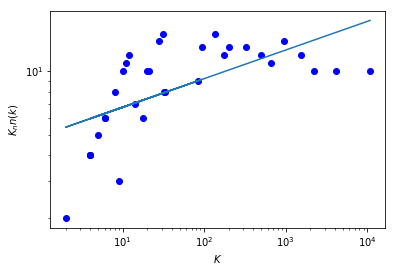

In [225]:
# Ejercicio 4b iii

grad_y2h = np.log10(gradonodlista_y2h)
gradpromvecinos_y2h = np.log10(gradopromediolista_y2h)

slope_y2h, intercept_y2h, r_value_y2h, p_value_y2h, std_err_y2h = stats.linregress(grad_y2h,gradpromvecinos_y2h)

print (slope_y2h, intercept_y2h, r_value_y2h, p_value_y2h, std_err_y2h)

intercepto_y2h = 10.0**intercept_y2h      # No se si esto se puede hacer: revisar
print (slope_y2h, intercept_y2h, intercepto_y2h)

plt.clf()
plt.loglog(gradonodlista_y2h,gradopromediolista_y2h,'bo') 
plt.plot(gradonodlista_y2h, powerlaw(gradonodlista_y2h, intercepto_y2h, slope_y2h))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
#plt.ylim(1,40)                      
plt.show()


In [233]:
# Coeficiente de correlación usando el estimador propuesto por NEWMAN 
# Para la red y2h 
# vi)

sumse_y2h = []
sums1_y2h = []
sums2_y2h = []
sums3_y2h = []
listnodos_y2h = []

# Ciclo que recorre todos los enlaces de la red
for enlace in list(graph_y2h.edges):    
    se = graph_y2h.degree(enlace[0])*graph_y2h.degree(enlace[1]) # multiplica grados de nodos en enlace
    sumse_y2h.append(se)    
    
    for node in list(enlace):                                       
        if node not in listnodos_y2h:        # se fija si el nodo está en la lista de nodos                                  
            
            listnodos_y2h.append(node)
            s1 = graph_y2h.degree(node)
            sums1_y2h.append(s1)
            s2 = graph_y2h.degree(node)**2
            sums2_y2h.append(s2)
            s3 = graph_y2h.degree(node)**3
            sums3_y2h.append(s3)        
            
print(sumarLista(sumse_y2h))

sumnumerador_y2h = (sumarLista(sums1_y2h)*(2*sumarLista(sumse_y2h)))-(sumarLista(sums2_y2h)**2) 
sumdenominador_y2h = (sumarLista(sums1_y2h)*sumarLista(sums3_y2h))-(sumarLista(sums2_y2h)**2)

coef_y2h = float(sumnumerador_y2h/sumdenominador_y2h)    # me tiene en duda que da -1, creo que habría que revisar  
print (coef_y2h)
#print (len(listnodos),len(netscience.edges()))

321421
-1.0


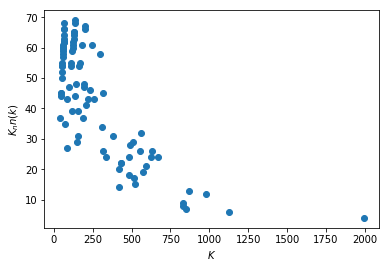

In [207]:
# Ejercicio 4bi

# Este ciclo recorre nodo por nodo, se fija en el grado de sus vecinos, suma sus grados y calcula el promedio
# Para la red APMS

gradosporgrado_apms = defaultdict(int)
gradosporgrado2_apms = defaultdict(int)
gradonodlista_apms = []
gradopromediolista_apms = []

for nod in list(graph_apms.node):
    vecinos=list(graph_apms.adj[nod])     #los vecinos de nodo
    gradonod=len(vecinos)                 # cantidad de vecinos de nodo o grado del nodo
    
    gradostotal=0
    for estevecino in vecinos:
        gradostotal = gradostotal + graph_apms.degree[estevecino]  #Suma los grados de todos los vecinos de nod
    try:
        gradopromedio = gradostotal/gradonod                       # Calcula el grado promedio de los vecinos de nod
    
    except:
        graph_apms.remove_nodes_from([nod])                        # Revisar este try que no hace nada 
    
        
    
#    gradonodlista.append(gradonod)
#    gradopromediolista.append(gradopromedio)
    gradosporgrado_apms[gradonod] += gradopromedio         # Diccionario contable que suma los promedios correspondientes a un mismo grado   
    gradosporgrado2_apms[gradonod]+= 1                     

# Arma lista con knn(k) y lista con k
for i,j in zip(gradosporgrado_apms.items(),gradosporgrado2_apms.items()):
    gradonodlista_apms.append(i[1])
    gradopromediolista_apms.append(i[1]/j[1])    

plt.scatter(gradonodlista_apms,gradopromediolista_apms)
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()

(-0.5175906752626944, 2.7323187026711526, -0.7996059807492256, 5.72203271778761e-21, 0.0416756013734934)
(-0.5175906752626944, 2.7323187026711526, 539.9066823054673)


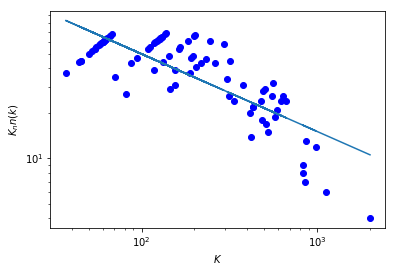

In [228]:
# Ejercicio 4biii

grad_apms = np.log10(gradonodlista_apms)
gradpromvecinos_apms = np.log10(gradopromediolista_apms)

slope_apms, intercept_apms, r_value_apms, p_value_apms, std_err_apms = stats.linregress(grad_apms,gradpromvecinos_apms)

print (slope_apms, intercept_apms, r_value_apms, p_value_apms, std_err_apms)

intercepto_apms = 10.0**intercept_apms      # No se si esto se puede hacer: revisar
print (slope_apms, intercept_apms, intercepto_apms)

plt.clf()
plt.loglog(gradonodlista_apms,gradopromediolista_apms,'bo') 
plt.plot(gradonodlista_apms, powerlaw(gradonodlista_apms, intercepto_apms, slope_apms))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
#plt.ylim(1,40)                      
plt.show()

In [235]:
# Coeficiente de correlación usando el estimador propuesto por NEWMAN 
# Para la red APMS
# vi)

sumse_apms = []
sums1_apms = []
sums2_apms = []
sums3_apms = []
listnodos_apms = []

# Ciclo que recorre todos los enlaces de la red
for enlace in list(graph_apms.edges):    
    se = graph_apms.degree(enlace[0])*graph_apms.degree(enlace[1]) # multiplica grados de nodos en enlace
    sumse_apms.append(se)    
    
    for node in list(enlace):                                       
        if node not in listnodos_apms:        # se fija si el nodo está en la lista de nodos                                  
            
            listnodos_apms.append(node)
            s1 = graph_apms.degree(node)
            sums1_apms.append(s1)
            s2 = graph_apms.degree(node)**2
            sums2_apms.append(s2)
            s3 = graph_apms.degree(node)**3
            sums3_apms.append(s3)        
            
print(sumarLista(sumse_apms))

sumnumerador_apms = (sumarLista(sums1_apms)*(2*sumarLista(sumse_apms)))-(sumarLista(sums2_apms)**2) 
sumdenominador_apms = (sumarLista(sums1_apms)*sumarLista(sums3_apms))-(sumarLista(sums2_apms)**2)

coef_apms = float(sumnumerador_apms/sumdenominador_apms)    # me tiene en duda que da -1, creo que habría que revisar  
print (coef_apms)
#print (len(listnodos),len(netscience.edges()))

15180373
0.0


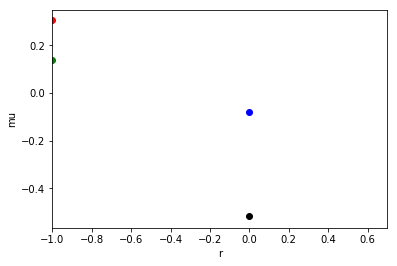

In [245]:
plt.scatter(coef,index,color="b")              # red ciencia
plt.scatter(coef_int,index_int,color="r")      # red internet
plt.scatter(coef_y2h,slope_y2h,color="g")      # red y2h
plt.scatter(coef_apms,slope_apms,color="k")    # red apms
plt.xlabel("r")
plt.ylabel("mu")
plt.xlim(-1,0.7)
plt.show()

In [ ]:
"""
Este ultimo grafico esta bueno porque podemos comparar los resultados con los de la diapo Ariel
Todas me dan mal, lo intenté, si pueden revisar el procedimiento sería bueno, así lo escribimos 
cuando esté bien

"""